Run pip install if there is no uproot package:
```bash
pip install --upgrade uproot4 awkward1 particle boost-histogram matplotlib mplhep pandas numexpr autograd hist hist[plot] humanize
```

In [1]:
#!pip install --upgrade --user uproot4 awkward1 particle boost-histogram matplotlib mplhep pandas numexpr autograd hist hist[plot] humanize

In [2]:
# pip install -r requirements.txt

In [3]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Pretty printing arrays
from pprint import pprint

In [4]:


file=uproot4.open("test.root")

# To see all object names in the file:
#file.items()

# only names: file.keys(), file.values()))

# To see items in subdirectories
# file.keys(recursive=True)

# There are more functions related to file:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyFile.html

# Root directories:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html

# To read multiple files at once (aka TChain)
# https://uproot.readthedocs.io/en/latest/basic.html#iterating-over-many-files


In [61]:
# File has a data tree called 'events'
# get events tree as a separate thing
tree = file["events"]

# Print number of entries
print(f"Number of entries: {tree.num_entries}")

# Uncomment this to see all values:
# tree.show()

# More TBranch functions:
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html

# Get all branch names for ForwardTRDHits
forward_trd_branches = [name for name in tree.keys(recursive=True) if "ForwardTRDHits" in name]
pprint(forward_trd_branches)

Number of entries: 1000
['ForwardTRDHits',
 'ForwardTRDHits/ForwardTRDHits.cellID',
 'ForwardTRDHits/ForwardTRDHits.flag',
 'ForwardTRDHits/ForwardTRDHits.g4ID',
 'ForwardTRDHits/ForwardTRDHits.position.x',
 'ForwardTRDHits/ForwardTRDHits.position.y',
 'ForwardTRDHits/ForwardTRDHits.position.z',
 'ForwardTRDHits/ForwardTRDHits.position.t',
 'ForwardTRDHits/ForwardTRDHits.momentum.x',
 'ForwardTRDHits/ForwardTRDHits.momentum.y',
 'ForwardTRDHits/ForwardTRDHits.momentum.z',
 'ForwardTRDHits/ForwardTRDHits.momentum.t',
 'ForwardTRDHits/ForwardTRDHits.length',
 'ForwardTRDHits/ForwardTRDHits.truth.trackID',
 'ForwardTRDHits/ForwardTRDHits.truth.pdgID',
 'ForwardTRDHits/ForwardTRDHits.truth.deposit',
 'ForwardTRDHits/ForwardTRDHits.truth.time',
 'ForwardTRDHits/ForwardTRDHits.truth.length',
 'ForwardTRDHits/ForwardTRDHits.truth.x',
 'ForwardTRDHits/ForwardTRDHits.truth.y',
 'ForwardTRDHits/ForwardTRDHits.truth.z',
 'ForwardTRDHits/ForwardTRDHits.energyDeposit']


```
TODO Nilay: write description of ForwardTRDHits event data.

Check (build histograms) for

1. `ForwardTRDHits/ForwardTRDHits.energyDeposit` vs `ForwardTRDHits/ForwardTRDHits.truth.deposit` is there difference?
2. `ForwardTRDHits/ForwardTRDHits.truth.[x,y,z,time]` vs `ForwardTRDHits/ForwardTRDHits.position.[x,y,z,t]`

```

Note :- "momentum.t", "position.t" no more gets created when I run the simulation

<b>Descriptions</b>

1. cellID :- 
2. flag :-
3. g4ID :-
4. position.x :- Hits or signature of the particle recorded by the detector in the x-direction(in mm)
5. position.y :- Hits or signature of the particle recorded by the detector in the y-direction(in mm)
6. position.z :- Hits or signature of the particle recorded by the detector in the z-direction(in mm)
7. momentum.x :- momentum of particle in x direction
8. momentum.y :- momentum of particle in y direction
9. momentum.z :- momentum of particle in z direction
10. EnergyDeposit :- Energy deposited by the particle in GeV
11. length :- 
12. truth.trackId :-
13. truth.pdgId :-
14. truth.deposit :- same as EnergyDeposit  
15. truth.time :- 
16. truth.length :- Null
17. truth.x :- Null
18. truth.y :- Null
19. truth.z :- Null 

In [6]:
# To load WHOLE data from a branch as an array:
hit_z = tree['ForwardTRDHits/ForwardTRDHits.position.z'].array()

# hit_z is "awkward array"
# https://awkward-array.org/what-is-awkward.html
# library=np to return/convert array as a numpy library.

print(hit_z)
print(f"There are total: {len(hit_z)} hits records")


# 261
# [[...],[...], .... ]

# for hits_in_event in hit_z:
#    print(f"Hits in the event: {len(hits_in_event)}")


[[3.41e+03], [3.41e+03], [3.41e+03, ... [3.41e+03, 3.41e+03], [3.41e+03]]
There are total: 1000 hits records


Text(0.5, 1.0, 'position z')

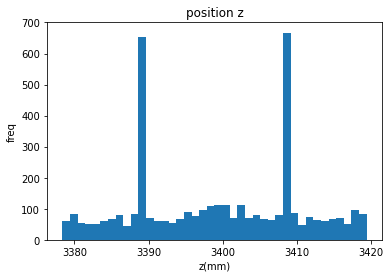

In [7]:
# We can use another representation of what array() returns:
pd_hit_z = tree['ForwardTRDHits/ForwardTRDHits.position.z'].array(library='pandas')
pd_hit_z.plot.hist(bins=40)
plt.xlabel("z(mm)")
plt.ylabel('freq')
plt.title("position z")

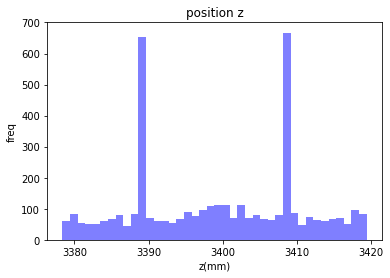

In [8]:
flat_hits_z = ak.flatten(hit_z)
num_bins = 40
plt.hist(flat_hits_z, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel("z(mm)")
plt.ylabel('freq')
plt.title("position z")
plt.show()

In [9]:
# It is possible to convert multiple branches, apply formulas, aliases, etc.
# arrays method is to be used for this

# Instead of this:
# hit_z = tree['hit_z'].array()
# hit_y = tree['hit_y'].array()
# hit_z = tree['hit_z'].array()

# For numpy:
hits = tree.arrays(filter_name="ForwardTRDHits/ForwardTRDHits.position.*", library='np')


# The resulting will be a dict like:
# { 'par0': array([ 5.81875  ,  7.471875 ,  ...],
#   'par1': array([ 5., 14.,  3., ... ],
#   ...}

hits["ForwardTRDHits.position.x"]

# If you need only arrays, .values() function may be used
# Finally you can unpack it as values (I use only 3 of pars here using [0,1,2] mask)
hits_x, hits_y, hits_z = tree.arrays(filter_name="ForwardTRDHits/ForwardTRDHits.position.[x,y,z]", library='np').values()

# Full info on this array methods
# https://uproot.readthedocs.io/en/latest/basic.html#reading-multiple-tbranches-as-a-group-of-arrays
# hits

## PLOTTING

In [10]:
# Going "event by event" matter (don't use it!)
for i in range(5):
    event_hits_z = hit_z[i]
    print(f"Event {i} has hits {event_hits_z}")

Event 0 has hits [3.41e+03]
Event 1 has hits [3.41e+03]
Event 2 has hits [3.41e+03, 3.42e+03]
Event 3 has hits [3.39e+03]
Event 4 has hits [3.39e+03]


In [11]:
hit_z[hit_z > 3378]

<Array [[3.41e+03], ... [3.41e+03]] type='1000 * var * float64'>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb805a16bb0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

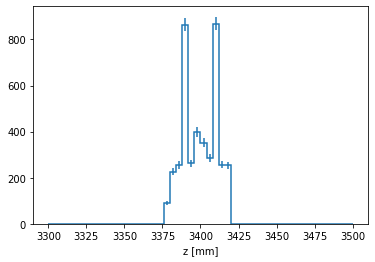

In [12]:
# fill the axes
h = Hist(hist.axis.Regular(50, 3300, 3500, name="Z", label="z [mm]", underflow=False, overflow=False))
    
flatten_array = ak.flatten(hit_z[hit_z > 3000])
h.fill(flatten_array)
h.plot()


# More on hist library
# https://hist.readthedocs.io/en/latest/
# https://github.com/scikit-hep/hist

# The library is very new and there might be bugs, there are a couple of other
# libraries that can work with histograms. Let me know



[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb8059b6430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

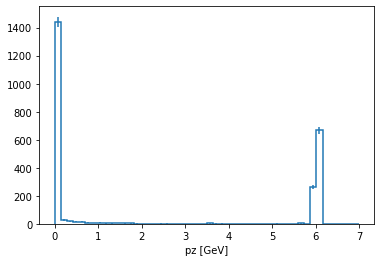

In [13]:
# fill the axes
mom_hst = Hist(hist.axis.Regular(50, 0, 7, name="All particle momentums", label="pz [GeV]", underflow=False, overflow=False),)

z_mom = tree['ForwardTRDHits/ForwardTRDHits.momentum.z'].array()
mom_hst.fill(ak.flatten(z_mom))
mom_hst.plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb8058c86a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

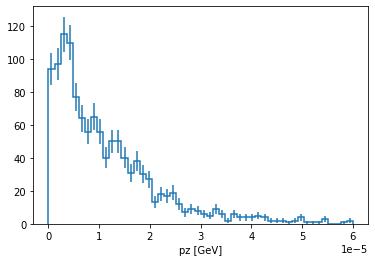

In [14]:
# fill the axes
mom_hst = Hist(hist.axis.Regular(50, 0, 0.00006, name="All particle momentums", label="pz [GeV]", underflow=False, overflow=False),)

z_mom = tree['ForwardTRDHits/ForwardTRDHits.momentum.z'].array()
mom_hst.fill(ak.flatten(z_mom))
mom_hst.plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb805850940>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

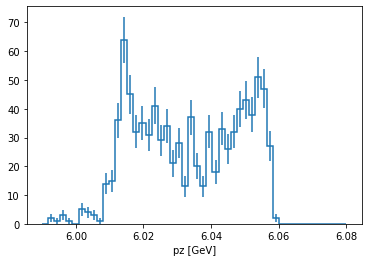

In [15]:
# fill the axes
mom_hst = Hist(hist.axis.Regular(50, 5.99, 6.08, name="All particle momentums", label="pz [GeV]", underflow=False, overflow=False),)

z_mom = tree['ForwardTRDHits/ForwardTRDHits.momentum.z'].array()
mom_hst.fill(ak.flatten(z_mom))
mom_hst.plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb8057d7b80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

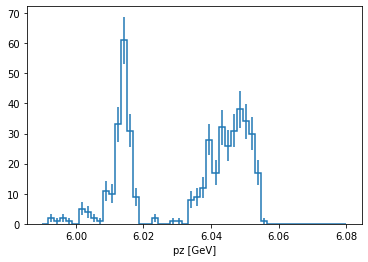

In [16]:
# fill the axes
bool_mask = hit_z > 3400

hit_z = hit_z[bool_mask]

z_mom = tree['ForwardTRDHits/ForwardTRDHits.momentum.z'].array()
z_mom = z_mom[bool_mask]

mom_hst = Hist(hist.axis.Regular(50, 5.99, 6.08, name="All particle momentums", label="pz [GeV]", underflow=False, overflow=False),)
mom_hst.fill(ak.flatten(z_mom))
mom_hst.plot()


In [75]:
hits_z=tree['ForwardTRDHits/ForwardTRDHits.position.z'].array()
hits_x=tree['ForwardTRDHits/ForwardTRDHits.position.x'].array()
hits_y=tree['ForwardTRDHits/ForwardTRDHits.position.y'].array()
filter_by_z = hits_z > 2000
print(filter_by_z) 

hit_x = hits_x.mask[filter_by_z] # keeps the size of the array same as before even after applying filter
hit_y = hits_y[filter_by_z]

print(ak.num(hit_x)) #Represents the number of subarray in the array

[[True], [True], [True, True], [True], ... True], [True, True], [True, True], [True]]
[1, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 22, 1, ... 4, 17, 44, 1, 1, 1, 2, 3, 2, 1, 2, 2, 1]


In [76]:
print(hit_x)

[[364], [603], [622, 624], [-113], ... [-521], [-332, -333], [613, 615], [-182]]


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fb7fea392b0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fb7fea39670>, text=[])

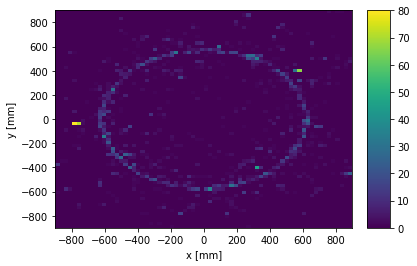

In [77]:
h = Hist(
    hist.axis.Regular(70, -900, 900, name="X", label="x [mm]", flow=False),
    hist.axis.Regular(70, -900, 900, name="Y", label="y [mm]", flow=False),
)

h.fill(ak.flatten(hit_x),ak.flatten(hit_y))
h.plot()

In [59]:
# For numpy:
events = tree.arrays(['hit_vol_name', 'hit_x', 'hit_y', 'hit_z'], library='ak')

events.type
#hit_y.type
hit_names = events.hit_vol_name


In [ ]:
def filter_by_detector_name(ak_array, name):
    return ak_array[:, :, :len(name)] == name

In [ ]:
mask = filter_by_detector_name(events.hit_vol_name, "cb_VTX")

print(mask)

In [57]:
h = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
)

filtered_hits_x = events.hit_x[mask]
filtered_hits_y = events.hit_y[mask]

h.fill(ak.to_numpy(ak.flatten(filtered_hits_x/10)),
       ak.to_numpy(ak.flatten(filtered_hits_y/10)))
h.plot()

NameError: name 'events' is not defined

In [ ]:
# cb_VTX
# cb_CTD
# cb
# ci
# ce

# plot only for electrons
# plot for protons
# plot for pi-
# to filter by particle we use hit_pdg
# electron - 11
# proton - 2212
# pi- 211
# https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf